In [4]:
import numpy as np
import pandas as pd
from IPython.display import HTML

from collab.foraging.toolkit import (
    animate_predictors,
    dataObject,
    generate_local_windows,
    generate_pairwiseCopying_predictor,
    generate_vicsek_predictor,
    plot_predictor,
    rescale_to_grid,
    subsample_frames_constant_frame_rate,
)

# Test velocity predictors on a snippet of fish data

In [5]:
# load data
fish_data = pd.read_csv("4wpf_test.csv")
gridMin = 0
gridMax = 300
grid_size = 50
fps = 121

# scaling and subsampling
fishDF_scaled = rescale_to_grid(
    fish_data, size=grid_size, gridMin=gridMin, gridMax=gridMax
)
fishDF_scaled_subsampled = subsample_frames_constant_frame_rate(
    fishDF_scaled, frame_spacing=60
)

# create a test foragers object with 20 frames
num_frames = 20
foragers_object = dataObject(
    fishDF_scaled_subsampled.loc[fishDF_scaled_subsampled["time"] < 20],
    grid_size=grid_size,
)

# get local windows
local_windows_kwargs = {
    "window_size": grid_size / 2,
    "sampling_fraction": 1,
    "skip_incomplete_frames": True,
}

foragers_object.local_windows_kwargs = local_windows_kwargs
local_windows = generate_local_windows(foragers_object)
foragers_object.local_windows = local_windows

original_frames: 18739
original_shape: (74956, 5)
resulting_frames: 313
resulting_shape: (1252, 5)


/Users/palka/Documents/Repositories/collab-creatures/collab/foraging/toolkit/utils.py:42: UserWarning: 
                NaN values in data. The default behavior of predictor/score generating functions is
                to ignore foragers with missing positional data. To modify, see documentation of
                `derive_predictors_and_scores` and `generate_local_windows`
                
  warnings.warn(


# Pairwise copying predictor

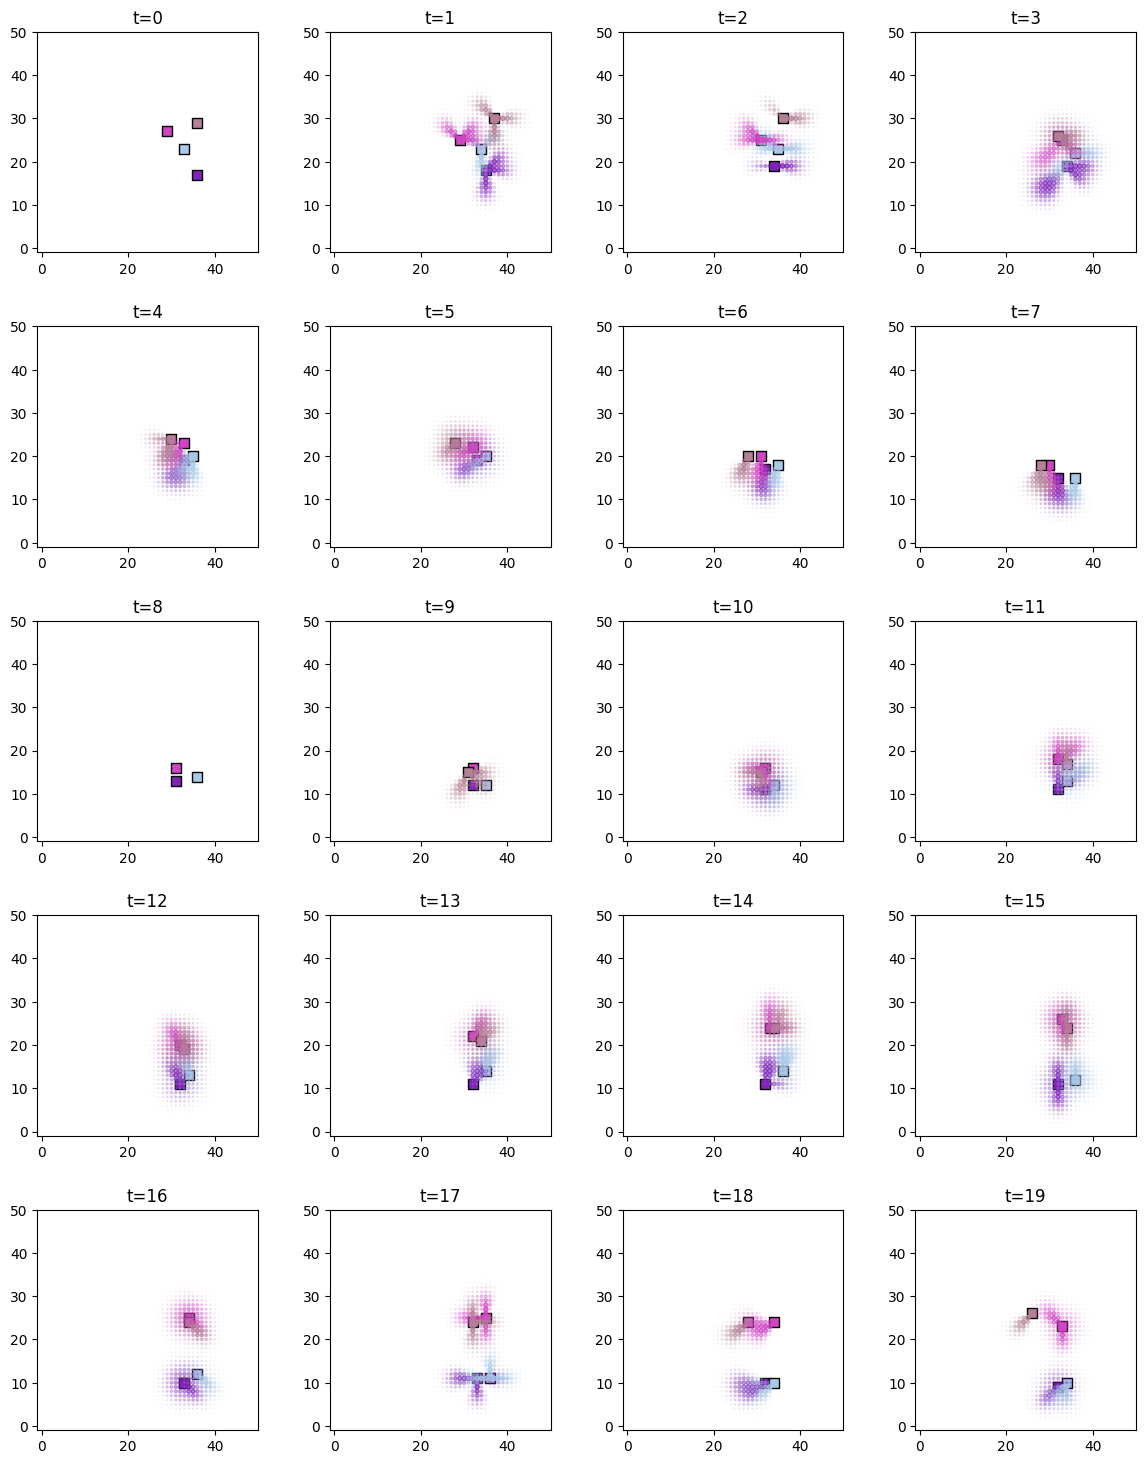

In [6]:
predictor_kwargs = {
    "pairwiseCopying": {
        "interaction_length": grid_size / 3,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    }
}

foragers_object.predictor_kwargs = predictor_kwargs

# compute predictor
pairwiseCopying_predictor = generate_pairwiseCopying_predictor(
    foragers_object, "pairwiseCopying"
)

# visualize predictor
plot_predictor(
    foragers_object.foragers,
    pairwiseCopying_predictor,
    "pairwiseCopying",
    forager_position_indices=[0, 1, 2, 3],
    forager_predictor_indices=[0, 1, 2, 3],
    time=range(num_frames),
    grid_size=grid_size,
    size_multiplier=10,
    random_state=99,
)

2024-12-12 10:43:56,303 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


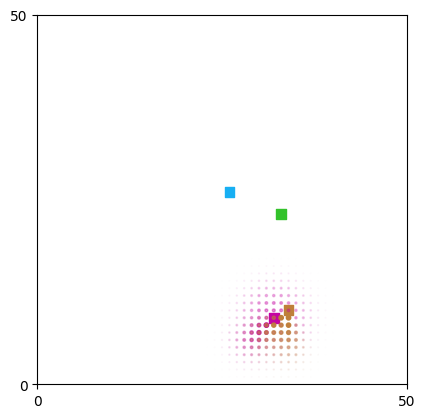

In [7]:
ani = animate_predictors(
    foragers_object.foragersDF,
    pairwiseCopying_predictor,
    predictor_name="pairwiseCopying",
    forager_position_indices=range(foragers_object.num_foragers),
    forager_predictor_indices=[0, 1],
    grid_size=grid_size,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())

### Adding interaction constraint

In [8]:
# suppose copying only occurs when velocity is > 1


def filter_max_v(f_ind, f, t, foragersDF, v_thresh, v_name):
    current_positions = foragersDF.loc[
        np.logical_and(foragersDF["forager"].isin(f_ind), foragersDF["time"] == t)
    ]
    f_ind_constr = current_positions.loc[
        current_positions[v_name] > v_thresh, "forager"
    ].to_list()
    return f_ind_constr

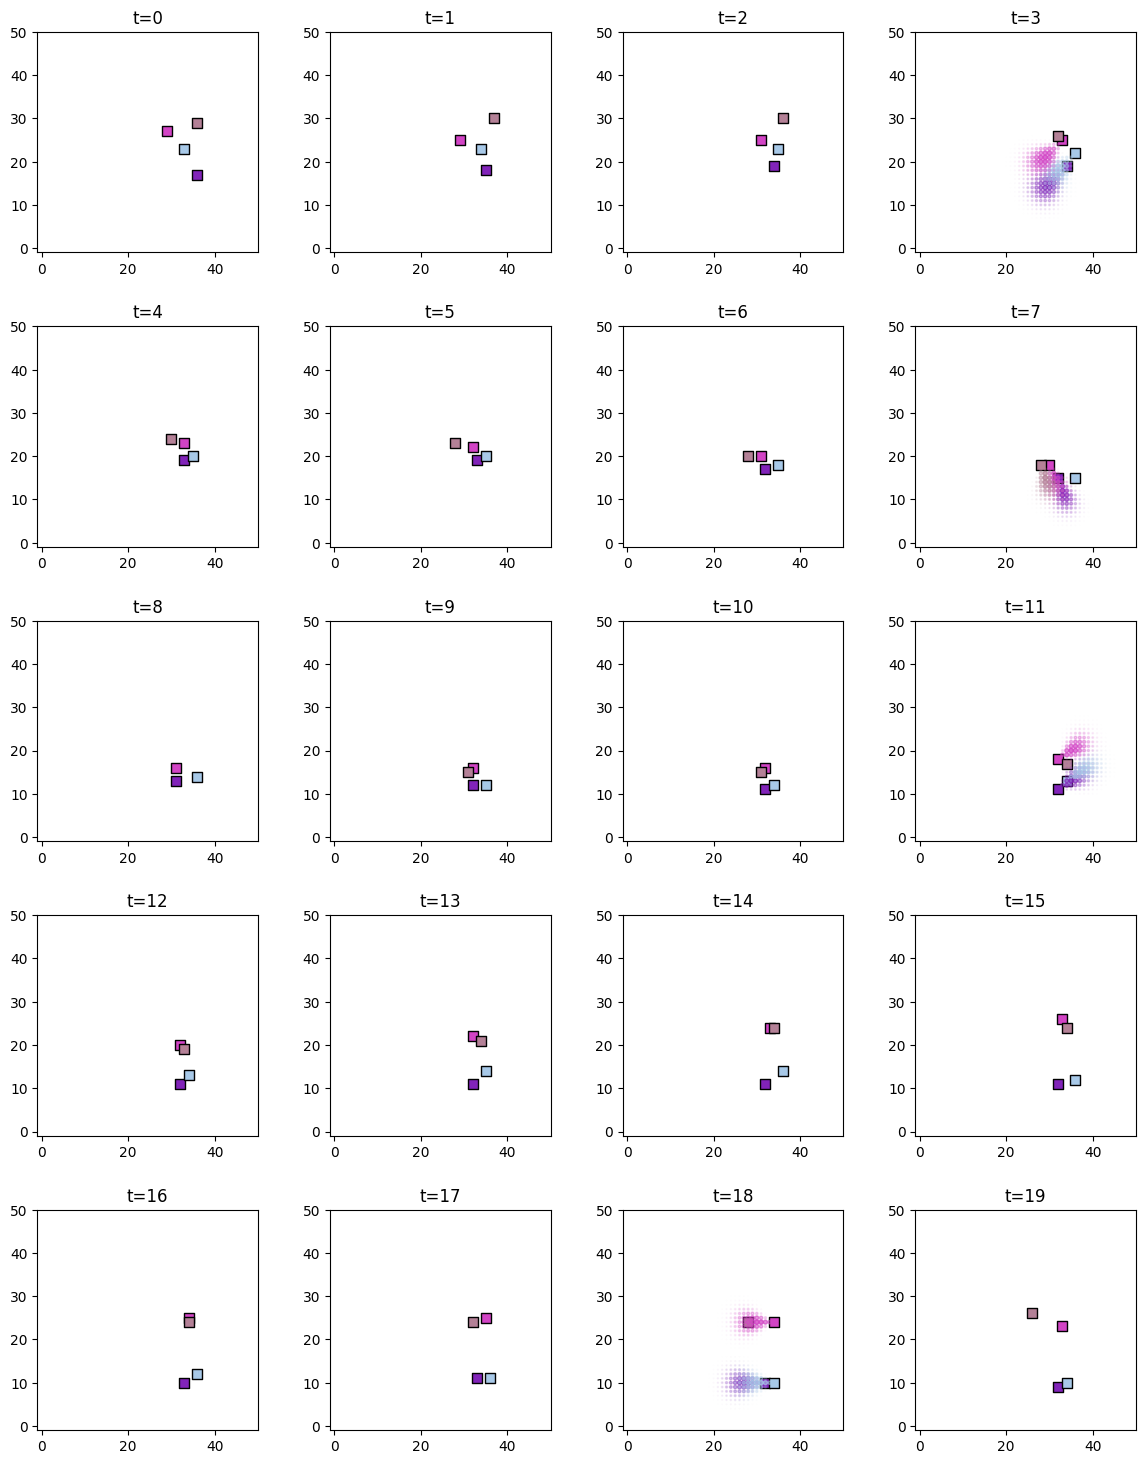

In [9]:
# compute predictor again, now with constraint
interaction_constraint_params = {"v_thresh": 3, "v_name": "v_dt=1"}
predictor_kwargs = {
    "pairwiseCopying_w_constraint": {
        "interaction_length": grid_size / 3,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
        "interaction_constraint": filter_max_v,
        "interaction_constraint_params": interaction_constraint_params,
    }
}
foragers_object.predictor_kwargs = predictor_kwargs

# compute predictor
pairwiseCopying_predictor_w_constraint = generate_pairwiseCopying_predictor(
    foragers_object, "pairwiseCopying_w_constraint"
)

# visualize predictor
plot_predictor(
    foragers_object.foragers,
    pairwiseCopying_predictor_w_constraint,
    "pairwiseCopying_w_constraint",
    forager_position_indices=[0, 1, 2, 3],
    forager_predictor_indices=[0, 1, 2, 3],
    time=range(num_frames),
    grid_size=grid_size,
    size_multiplier=10,
    random_state=99,
)

# Repeating above for Vicsek predictor

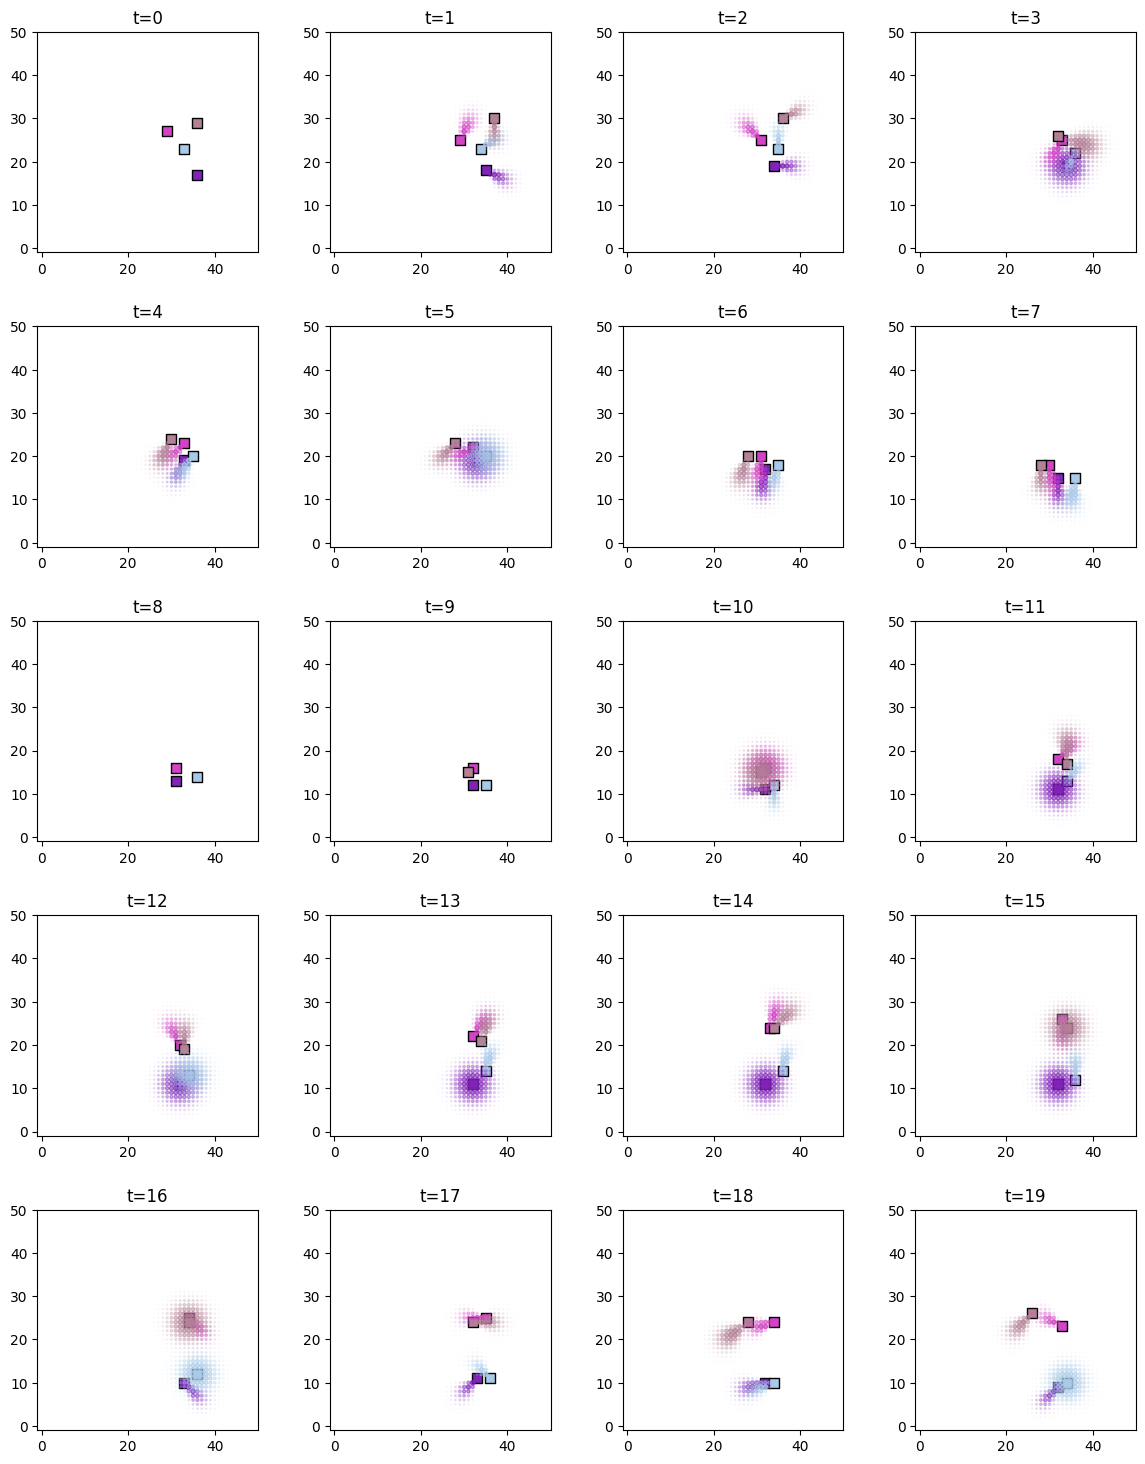

In [10]:
predictor_kwargs = {
    "vicsek": {
        "interaction_length": grid_size / 3,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
    }
}

foragers_object.predictor_kwargs = predictor_kwargs

# compute predictor
vicsek_predictor = generate_vicsek_predictor(foragers_object, "vicsek")

# visualize predictor
plot_predictor(
    foragers_object.foragers,
    vicsek_predictor,
    "vicsek",
    forager_position_indices=[0, 1, 2, 3],
    forager_predictor_indices=[0, 1, 2, 3],
    time=range(num_frames),
    grid_size=grid_size,
    size_multiplier=10,
    random_state=99,
)

2024-12-12 10:44:22,531 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


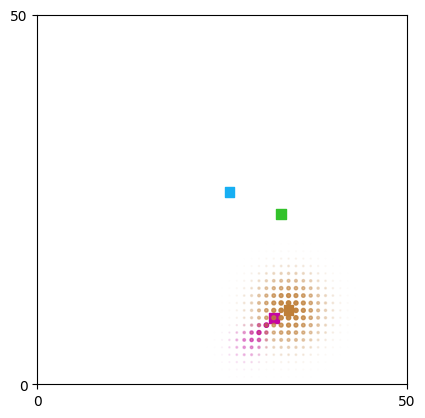

In [11]:
ani = animate_predictors(
    foragers_object.foragersDF,
    vicsek_predictor,
    predictor_name="vicsek",
    forager_position_indices=range(foragers_object.num_foragers),
    forager_predictor_indices=[0, 1],
    grid_size=grid_size,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())

### With interaction constraint

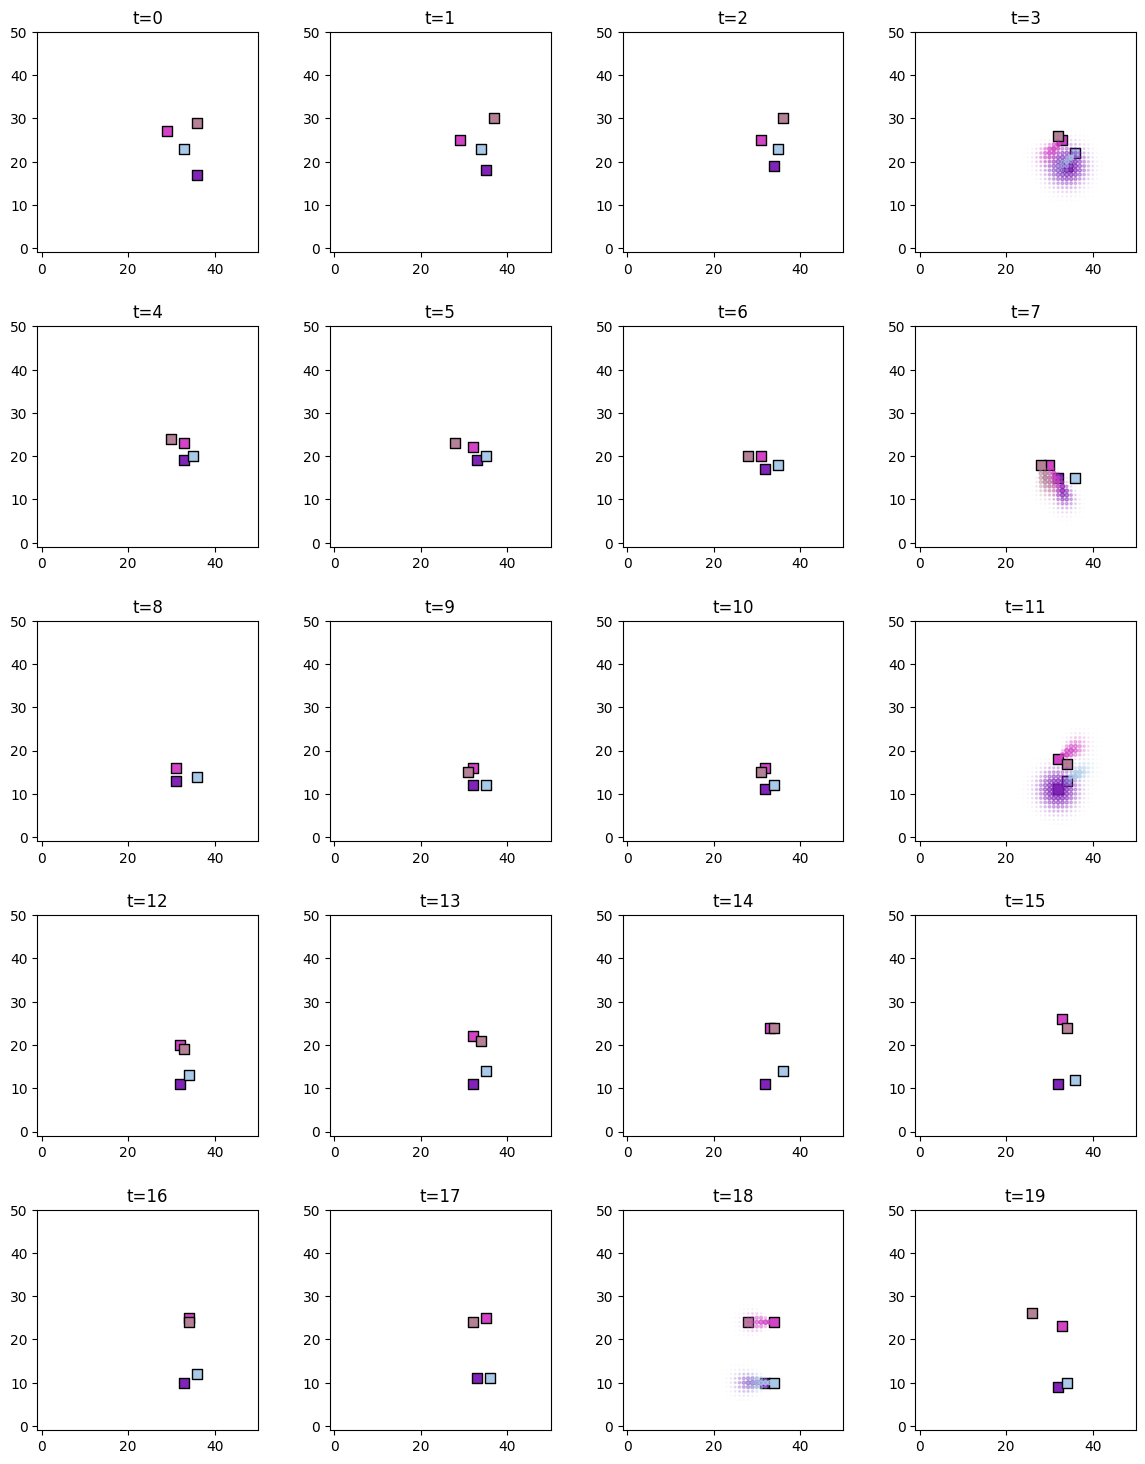

In [12]:
# compute predictor again, now with constraint
interaction_constraint_params = {"v_thresh": 3, "v_name": "v_dt=1"}
predictor_kwargs = {
    "vicsek_w_constraint": {
        "interaction_length": grid_size / 3,
        "dt": 1,
        "sigma_v": 3,
        "sigma_t": 0.3,
        "interaction_constraint": filter_max_v,
        "interaction_constraint_params": interaction_constraint_params,
    }
}
foragers_object.predictor_kwargs = predictor_kwargs

# compute predictor
vicsek_predictor_w_constraint = generate_vicsek_predictor(
    foragers_object, "vicsek_w_constraint"
)

# visualize predictor
plot_predictor(
    foragers_object.foragers,
    vicsek_predictor_w_constraint,
    "vicsek_w_constraint",
    forager_position_indices=[0, 1, 2, 3],
    forager_predictor_indices=[0, 1, 2, 3],
    time=range(num_frames),
    grid_size=grid_size,
    size_multiplier=10,
    random_state=99,
)